In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

# 타이타닉 데이터 생존자수 예측 모델 만들기
![TItanic-Survival-Infographic](https://user-images.githubusercontent.com/46340424/61845049-ab362000-aedc-11e9-9f02-e5663652c524.jpg)

In [3]:
train = pd.read_csv("./titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("./titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape, test.shape

((891, 12), (418, 11))

# 가설 설정
## 성별에 따른 생존여부
## 좌석 계층에 따른 생존 여부
## 항구목적지에 따른 생존여부
## 가족 수에 따른 생존여부

# bar_chart를 만들어서 feature별로 생존률을 보여줌

In [6]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index = ["Survived", "dead"])
    df.plot.bar(stacked = True, figsize = (10, 5), )
    plt.legend(loc = (1.2, 0.5))
    plt.show()

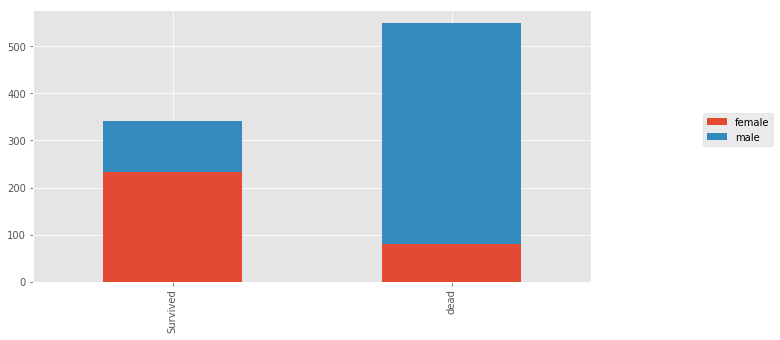

In [7]:
bar_chart("Sex")

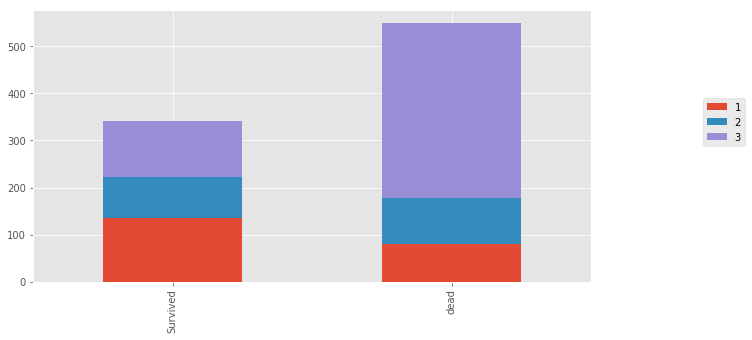

In [8]:
bar_chart("Pclass")

# 각 결측치 파악하기

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# dataset 한꺼번에 묶기

In [11]:
train_test_data = [train, test]

In [12]:
def judge():
    for dataset in train_test_data:
        print(dataset.isna().sum() / dataset.shape[0], "\n")

In [13]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64 



# Embarked 결측치 처리
## S가 가장 많으므로 결측치를 S값으로 대체 

In [14]:
train[train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train[train["Embarked"].isna()] = train[train["Embarked"].isna()].fillna("S")

In [17]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64 



# 이름의 정보 추출하기
## 이름에는 각 사람들의 성별, 지위등을 확인 할 수 있는 keyword가 있다
## 따라서 정규표현식을 가지고 이름을 분할해 정보를 추출하기로 했다

In [18]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.')

In [19]:
for dataset in train_test_data:
    dataset.drop("Name", axis = 1, inplace = True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


# 추출한 이름을 가지고 성별을 확인해보자

In [22]:
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
pd.crosstab(test["Title"], test["Sex"])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


# 각자의 이름 정보를 통일시키기로 했다

In [24]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


# 통일한 이름 정보등을 통해 생존률을 확인했다.
### 여성이 생존률이 더 높았으며 남성의 생존률은 거의 없다고 볼 수 있다.
### 지위에 따라서도 생존률이 다름을 볼 수 있었다.

In [26]:
train[["Title", "Survived"]].groupby("Title").mean().sort_values(by = "Survived", ascending = False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Fare 결측치를 처리하기

In [29]:
test[test["Fare"].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,male,60.5,0,0,3701,NaN,NaN,S,Mr


# Fare에 따라서 Title로 기준을 잡은 후 중위값을 보았다.
## 결측치의 특징을 바탕으로 결측치를 채워넣음

In [30]:
test[["Fare", "Title"]].groupby("Title").median()

,Fare
Title,
Master,21.07500
Miss,13.50000
Mr,10.50000
Mrs,27.72080
Rare,55.17915


In [31]:
test[test["Fare"].isna()] = test[test["Fare"].isna()].fillna(10.5)

In [32]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
Title          0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.779904
Embarked       0.000000
Title          0.000000
dtype: float64 



# Age 결측치 채우기

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


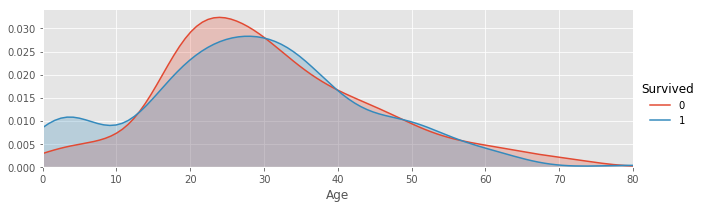

In [33]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train["Age"].max()))
facet.add_legend()
plt.show()

# Pclass와 Age값의 특징을 가지고 정보를 추출하기로 했다.

In [34]:
for dataset in train_test_data:
    dataset["Age"].fillna(dataset.groupby("Pclass")["Age"].transform("median"), inplace = True)

In [35]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
Title          0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.779904
Embarked       0.000000
Title          0.000000
dtype: float64 



# Ticket값은 삭제

In [36]:
for dataset in train_test_data:
    dataset.drop("Ticket",axis = 1, inplace = True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,12.2875,NaN,S,Mrs


# Cabin 결측치 처리하기
### 짐이 있냐 없냐의 여부에 따라 생존률이 달라지는지 알아보기 위해서 전처리 시작
### map함수를 이용해서 결측치를 없애버림

In [39]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(lambda x : x[0] if type(x) == str else "0")

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,0,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,0,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,0,S,Mr


## 짐이 없으면 "0"으로 해놓았음 -> 0으로 바꿔주고 새로운 feature인 IsCabin을 만듬

In [41]:
for dataset in train_test_data:
    dataset["IsCabin"] = 1
    dataset.loc[dataset["Cabin"] == "0", "IsCabin"] = 0

In [42]:
for dataset in train_test_data:
    dataset.drop("Cabin", axis = 1, inplace = True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsCabin
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsCabin
0,892,3,male,34.5,0,0,7.8292,Q,Mr,0
1,893,3,female,47.0,1,0,7.0000,S,Mrs,0
2,894,2,male,62.0,0,0,9.6875,Q,Mr,0
3,895,3,male,27.0,0,0,8.6625,S,Mr,0
4,896,3,female,22.0,1,1,12.2875,S,Mrs,0


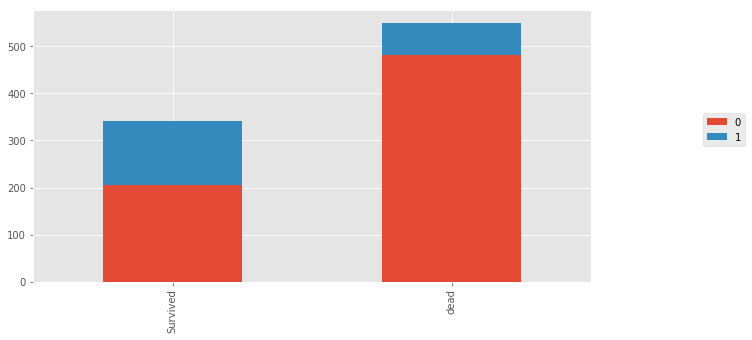

In [45]:
bar_chart("IsCabin")

# Fare 처리하기
## 이상치 데이터가 너무 많은것을 볼 수 있음
### qcut을 통해서 이상치 데이터를 잘라냄

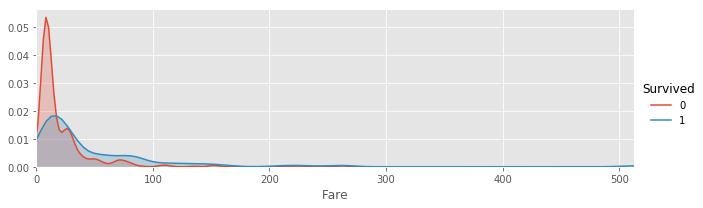

In [46]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim = (0, train["Fare"].max()))
facet.add_legend()
plt.show()

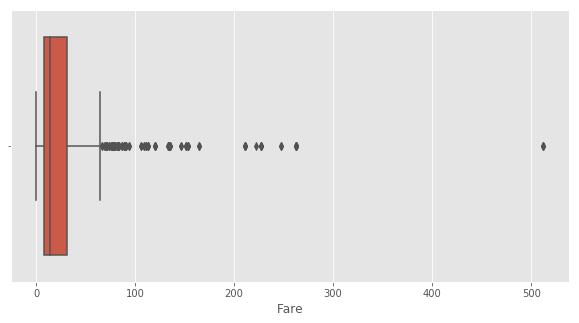

In [47]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(data = train, x = "Fare")
plt.show()

In [48]:
np.sort(pd.qcut(train["Fare"], 4).unique())

array([Interval(-0.001, 7.91, closed='right'),
       Interval(7.91, 14.454, closed='right'),
       Interval(14.454, 31.0, closed='right'),
       Interval(31.0, 512.329, closed='right')], dtype=object)

In [49]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31.0), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31.0, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

# Family 변수 만들기
## 가족의 유무에 따라서 생존률이 바뀔수 있음을 가설로 세워놓고 검증해보았다.

In [50]:
for dataset in train_test_data:
    dataset["Family"] = dataset["SibSp"] + dataset["Parch"]

In [51]:
for dataset in train_test_data:
    dataset.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family
0,1,0,3,male,22.0,0,S,Mr,0,1
1,2,1,1,female,38.0,3,C,Mrs,1,1
2,3,1,3,female,26.0,1,S,Miss,0,0
3,4,1,1,female,35.0,3,S,Mrs,1,1
4,5,0,3,male,35.0,1,S,Mr,0,0


In [53]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family
0,892,3,male,34.5,0,Q,Mr,0,0
1,893,3,female,47.0,0,S,Mrs,0,1
2,894,2,male,62.0,1,Q,Mr,0,0
3,895,3,male,27.0,1,S,Mr,0,0
4,896,3,female,22.0,1,S,Mrs,0,2


In [54]:
for dataset in train_test_data:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["Family"] == 0, "IsAlone"] = 1

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family,IsAlone
0,1,0,3,male,22.0,0,S,Mr,0,1,0
1,2,1,1,female,38.0,3,C,Mrs,1,1,0
2,3,1,3,female,26.0,1,S,Miss,0,0,1
3,4,1,1,female,35.0,3,S,Mrs,1,1,0
4,5,0,3,male,35.0,1,S,Mr,0,0,1


In [56]:
for dataset in train_test_data:
    dataset.drop("Family", axis = 1, inplace = True)

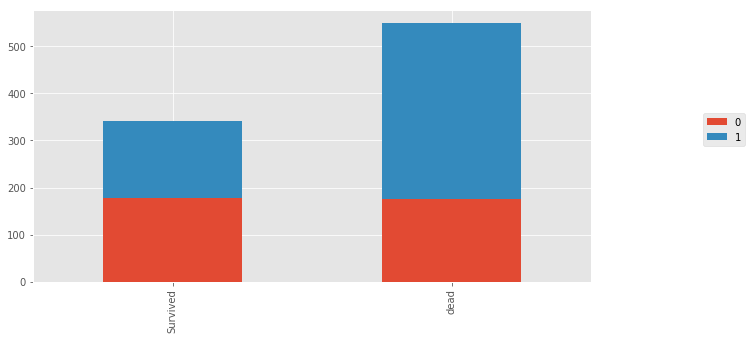

In [57]:
bar_chart("IsAlone")

In [58]:
train[["IsAlone", "Survived"]].groupby("IsAlone", as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [59]:
np.sort(pd.cut(train.Age, 5).unique())

array([Interval(0.34, 16.336, closed='right'),
       Interval(16.336, 32.252, closed='right'),
       Interval(32.252, 48.168, closed='right'),
       Interval(48.168, 64.084, closed='right'),
       Interval(64.084, 80.0, closed='right')], dtype=object)

In [60]:
#나눈 순서에 따라서 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16.0, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16.0) & (dataset["Age"] <= 32.0), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32.0) & (dataset["Age"] <= 48.0), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48.0) & (dataset["Age"] < 64.0), "Age"] = 3
    dataset.loc[dataset["Age"] > 64.0, "Age"] = 4
    dataset["Age"] = dataset["Age"].astype(int)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone
0,1,0,3,male,1,0,S,Mr,0,0
1,2,1,1,female,2,3,C,Mrs,1,0
2,3,1,3,female,1,1,S,Miss,0,1
3,4,1,1,female,2,3,S,Mrs,1,0
4,5,0,3,male,2,1,S,Mr,0,1


# Age와 Pclass로 결측치를 묶었으니 새로운 컬럼을 제시해서 Age_class를 만들어봄

In [62]:
for dataset in train_test_data:
    dataset["Age_class"] = dataset.Age * dataset.Pclass

In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age_class
0,1,0,3,male,1,0,S,Mr,0,0,3
1,2,1,1,female,2,3,C,Mrs,1,0,2
2,3,1,3,female,1,1,S,Miss,0,1,3
3,4,1,1,female,2,3,S,Mrs,1,0,2
4,5,0,3,male,2,1,S,Mr,0,1,6


In [64]:
#이름 추출값도 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4})

# Embarked의 생존율을 본 결과 C를 제외한 나머지 부분은 생존율에 큰 영향을 끼쳐보이지 않는다 따라서 Q와 S를 합쳐서 계산시켰다.

In [65]:
train[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [66]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].replace("Q", "S")

In [67]:
train[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
S,0.344398


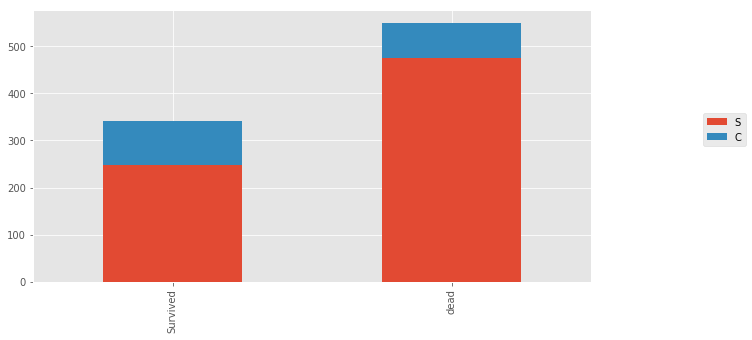

In [68]:
bar_chart("Embarked")

# 나머지 feature들을 다 숫자형 범주로 만들어버림

In [69]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male" : 0, "female" : 1})
    dataset["Embarked"] = dataset["Embarked"].map({"S" : 0, "C" : 1})

In [70]:
train.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int32
Fare           int32
Embarked       int64
Title          int64
IsCabin        int64
IsAlone        int64
Age_class      int64
dtype: object

In [71]:
test.dtypes

PassengerId    int64
Pclass         int64
Sex            int64
Age            int32
Fare           int32
Embarked       int64
Title          int64
IsCabin        int64
IsAlone        int64
Age_class      int64
dtype: object

# 데이터 모델링 하기

In [72]:
train.drop("PassengerId", axis = 1, inplace = True)

In [73]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age_class
0,0,3,0,1,0,0,0,0,0,3
1,1,1,1,2,3,1,2,1,0,2
2,1,3,1,1,1,0,1,0,1,3
3,1,1,1,2,3,0,2,1,0,2
4,0,3,0,2,1,0,0,0,1,6


In [74]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age_class
0,892,3,0,2,0,0,0,0,1,6
1,893,3,1,2,0,0,2,0,0,6
2,894,2,0,3,1,0,0,0,1,6
3,895,3,0,1,1,0,0,0,1,3
4,896,3,1,1,1,0,2,0,0,3


In [75]:
from sklearn.model_selection import train_test_split

predictors = train.drop('Survived', axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
logreg.score(x_train, y_train)

0.8126801152737753

In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.76


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

84.26


# Gradient Boosting 알고리즘 설명

### 데이터의 분포를 매번 바꾸는 것이 Adaboost의 주요한 특징이라면, GB는 이전 약한 분류기에서 발생된 잔차에 대해 다음의 약한 분류기를 적합시키는 것이 특징이다. 이때의 잔차가 바로 Gradient로 표현된다. GB에 대한 접근은 Loss function에서부터 시작한다.  우선 GB regressors에 대한 접근이다. 

$L(\mathbf{y},\,F(\mathbf{x}))=\sum_{\forall i}(y_{i}-F(x_{i}))^{2}/2,\quad i=1,...,n$


### 여기서 $L$을 함수 $F(x_{i})$로 미분하는 것이다. 사실 이 부분은 함수공간에 대해 알고 있어야 명확히 이해할 수 있다. 그러나 나 같은 평민은... 함수공간이 익숙하질 않으므로 직관적으로 설명하겠다. 

### 우선 $F(x_{i})$는 여러번의 반복을 거쳐 $i$데이터에 대한 최종적인 강한 분류기가 될 녀석이란 점을 분명히 하자. 게다가 $F(x_{i})$는 최종적으로 어떤 숫자를 반환하게 된다. 이 자체를 간단하게 모수로 취급해버리자. 그러면 다음과 같은 미분이 가능해진다. 

$\dfrac{\partial L(y_{i},\,F(x_{i}))}{\partial F(x_{i})}=F(x_{i})-y_{i}$


### 좌변과 우변에 각각 -1을 곱하면,

$y_{i}-F(x_{i})=-\dfrac{\partial L(y_{i},\,F(x_{i}))}{\partial F(x_{i})}$이 된다. 이것을 $-g(x_{i})$로 정의하자.

### 이를 통해 잔차가 기울기의 의미를 가지는 것을 확인할 수 있다. 음의 기울기 $-g(x_{i})$가 0이라면 $F(x_{i})$가 $y_{i}$를 굉장히 잘 설명했다는 것이 된다. 결과적으로, 우리의 목적은 $-g(x_{i})$를 0으로 수렴하도록, 다시 말해, Loss를 최소화하는 $F(x_{i})$를 만들면된다. 그리고 이 작업은 Gradient descent algorithm과 유사하다. 이 지점이 바로 Gradient boosting이란 이름을 붙게 하는 곳이다. 

### $F:=F+\rho h$, 이때 $h$는 $-g(x_{i})$ 위에 만들어진 약한 분류기이다. 정리하면, 음의 기울기에 대해 약한 분류기를 적합시켜 나가는 것이다. $\rho$는 learning rate를 의미하며, 이를 적절하게 정해주는 것도 중요한 문제라 알고 있다. 잔차란 단어를 사용하지 않는 이유는 음의 기울기가 일반적인 의미를 잘 담아내기 때문이다. 한 가지 예로, loss function이 Huber loss인 경우, 음의 기울기가 위와 같이 잔차로 표현되지 않는다. 

### 더욱이 다음과 같이 regularized를 이용하여 잡음에 가까운 약한 분류기들은 제거함으로써 모델의 과적합을 방지할 수 있게 된다. 이는 XGboost의 토대가 되기도 한다.

$F_{t+1}:=F_{t}+\rho \beta_{t+1} h_{t+1}$와 같이 $\beta_{t}$

### 마지막으로 GB역시 최종적인 강한 분류기가 다음과 같이 GAM의 형태로 표현됨을 알 수 있다. 

$H(x)=\sum_{\forall t}\beta_{t}h_{t}(x)$

In [80]:
variable = pd.DataFrame(train.columns[1:], columns = ["variable"])
importances = pd.DataFrame(gbc.feature_importances_, columns = ["importance"])
df_importances = pd.concat([variable, importances], axis = 1).sort_values(by = "importance", ascending = False)
df_importances

,variable,importance
5,Title,0.602831
0,Pclass,0.161626
3,Fare,0.095622
8,Age_class,0.031025
6,IsCabin,0.030505
1,Sex,0.027400
2,Age,0.020369
4,Embarked,0.018984
7,IsAlone,0.011638


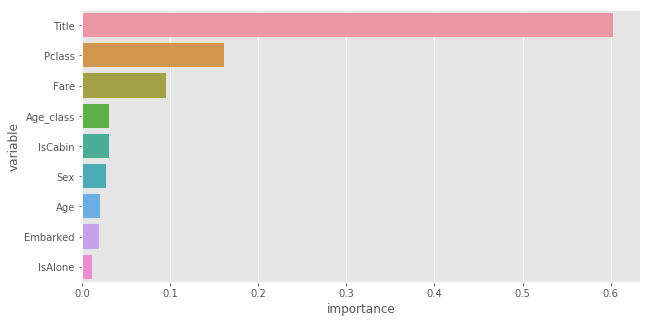

In [81]:
plt.figure(figsize = (10, 5))
sns.barplot(data = df_importances,x = "importance", y = "variable", orient='h')
plt.show()

In [82]:
predict = gbc.predict(test.drop("PassengerId", axis = 1))
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : predict})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [89]:
#Pclass, Sex, Age, Fare, Embarked, Title, IsCabin, IsAlone, Age_class
dicaprio = np.array([3, 0, 1, 0, 1, 0, 0, 1, 3])
winslet = np.array([1, 1, 1, 3, 1, 1, 1, 0, 1])

In [90]:
gbc.predict_proba(winslet.reshape(1, -1))[0,1]

0.9703437965237591

In [91]:
gbc.predict_proba(dicaprio.reshape(1, -1))[0,1]

0.17005280335841735